# 2. Bivariate plotting

In previous lesson, we have seen how to do univariate plotting. We can do a lot of things with it. But we will need more complex plotting.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
root_path="https://minio.lab.sspcloud.fr/pengfei/diffusion/data_viz"
input_file=f'{root_path}/winemag-data_first150k.csv'
reviews=pd.read_csv(input_file,index_col=0)

## 2.1 Scatter plot

 The simplest bivariate plot is the lowly `scatter plot`. A simple scatter plot simply maps each variable of interest to a point in two-dimensional space.

The following example first filter rows which has price < 100, then sample 100 row
at last show a scatter plot with x as vin price , y as vin score


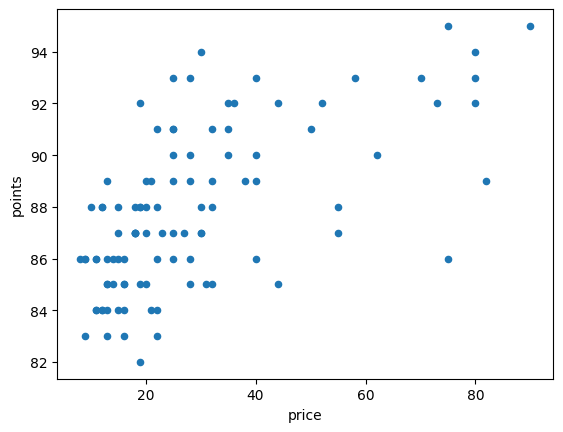

In [4]:
reviews[reviews['price'] < 100].sample(100).plot.scatter(x='price', y='points')
plt.show()

Note that in order to make effective use of this plot, we had to down-sample our data, taking just 100 points from the full set. This is because naive scatter plots do not effectively treat points which map to the same place.

For example, if two wines, both costing 100 dollars, get a rating of 90, then the second one is over-plotted onto the first one, and we add just one point to the plot.

This isn't a problem if it happens just a few times. But with enough points the distribution starts to look like a shapeless blob, and you lose the forest for the trees

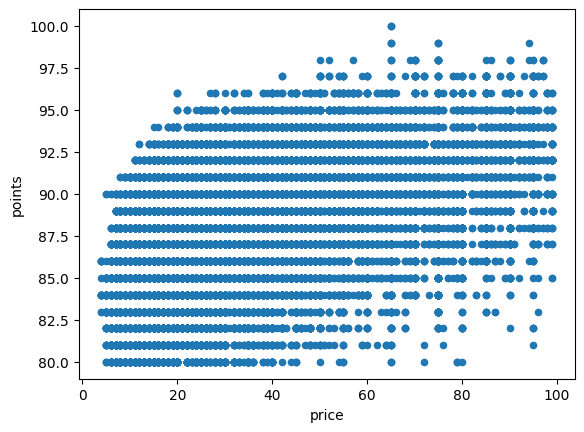

In [5]:
# without sampling
reviews[reviews['price'] < 100].plot.scatter(x='price', y='points')
plt.show()

## 2.2 Hex plot

A hexplot aggregates points in space into hexagons, and then colorize those hexagons. Below is an example

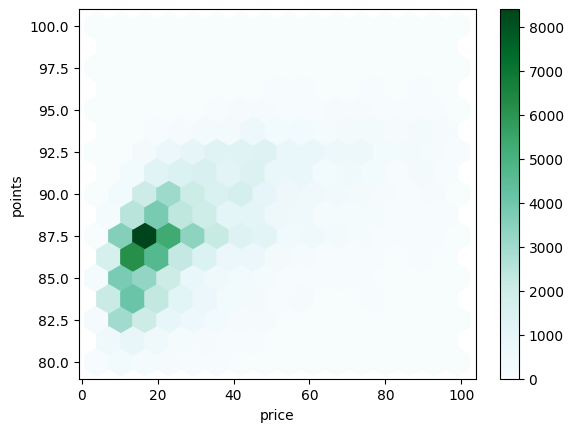

In [6]:

reviews[reviews['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15)
plt.show()

The data in this plot is directly comparable to the scatter plot from earlier, but the story it tells us
is very different. The hexplot provides us with a much more useful view on the dataset, showing that the
bottles of wine reviewed by Wine Magazine cluster around 87.5 points and around $20.

Hexplots and scatter plots can by applied to combinations of interval variables or ordinal categorical variables.
To help alleviate over-plotting, scatter plots (and, to a lesser extent, hexplots) benefit from variables which can
take on a wide range of unique values.

## 2.3 Stacked plot

Scatter plots and hex plots are new. But we can also use the simpler plots we saw in the last notebook.

The easiest way to modify them to support another visual variable is by using stacking. A stacked chart
is one which plots the variables one on top of the other.

We'll use a supplemental selection of the five most common wines for this next section.

In [7]:
wine_counts_file=f"${root_path}/top-five-wine-score-counts.csv'
wine_counts = pd.read_csv(wine_counts_file,index_col=0)

print(wine_counts.head())


        Bordeaux-style Red Blend  Cabernet Sauvignon  Chardonnay  Pinot Noir  \
points                                                                         
80                           5.0                87.0        68.0        36.0   
81                          18.0               159.0       150.0        83.0   
82                          72.0               435.0       517.0       295.0   
83                          95.0               570.0       669.0       346.0   
84                         268.0               923.0      1146.0       733.0   

        Red Blend  
points             
80           72.0  
81          107.0  
82          223.0  
83          364.0  
84          602.0  


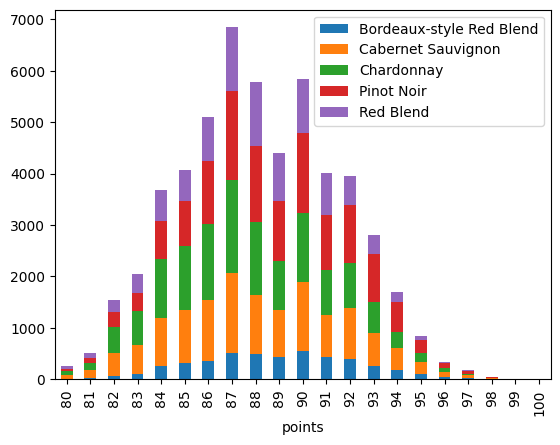

In [8]:
wine_counts.plot.bar(stacked=True)
plt.show()

Stacked bar plots share the strengths and weaknesses of univariate bar charts. They work best for nominal
categorical or small ordinal categorical variables.

Another simple example is the area plot, which lends itself very naturally to this form of manipulation:

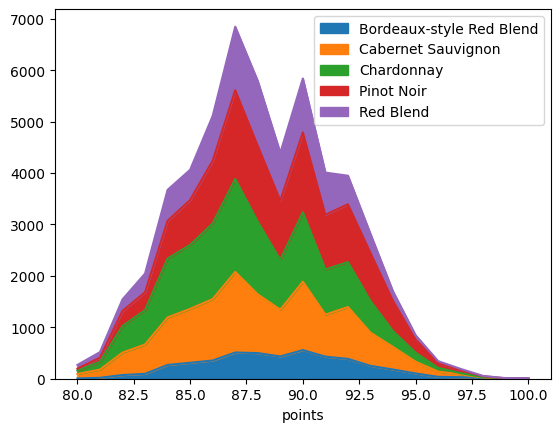

In [9]:
wine_counts.plot.area()
plt.show()


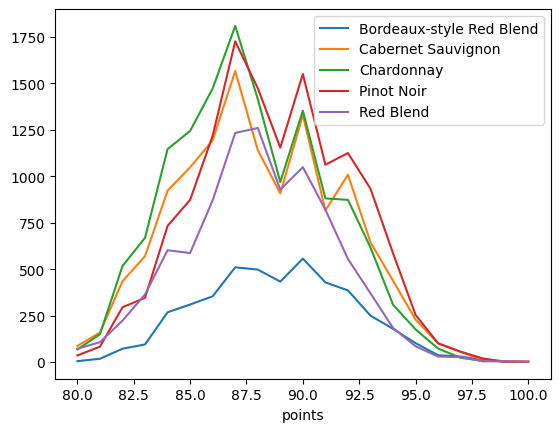

In [10]:
wine_counts.plot.line()
plt.show()

## 2.4 When to use these plot

1.Scatter plots and hex plots work best with a mixture of ordinal categorical and interval data.

2.Nominal categorical data makes sense in a (stacked) bar chart, but not in a (bivariate) line chart.

3.Interval data makes sense in a bivariate line chart, but not in a stacked bar chart.

## 2.5 Exercise


In [13]:
input_file=f"{root_path}/Pokemon.csv"
pokemon=pd.read_csv(input_file,index_col=0)


### Q1. scatter plot on attack and defense



<AxesSubplot:xlabel='Attack', ylabel='Defense'>

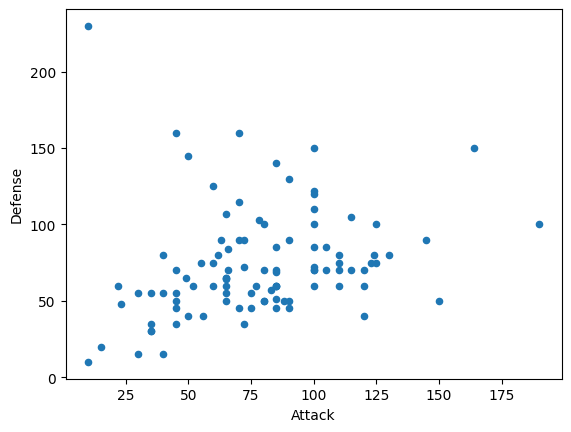

In [14]:
# scatter plot for one hundred row
pokemon.sample(100).plot.scatter(x='Attack',y='Defense')

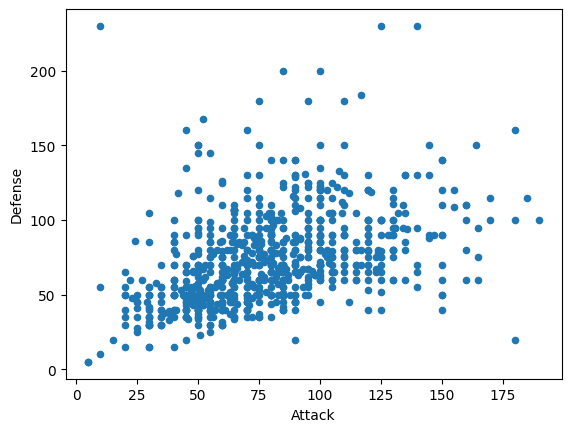

In [15]:
# scatter plot for all row
pokemon.plot.scatter(x='Attack',y='Defense')
plt.show()

### Q2. hex plot on attack and defense



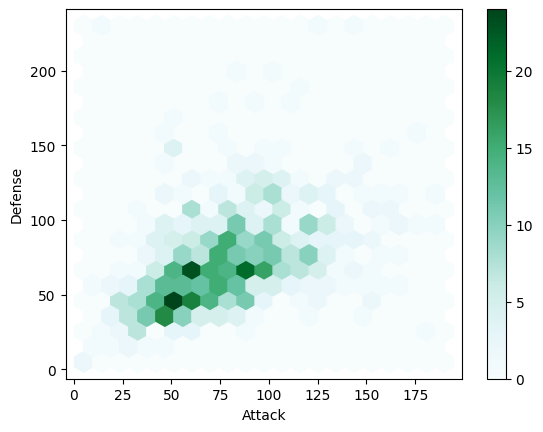

In [16]:
pokemon.plot.hexbin(x='Attack', y='Defense', gridsize=20)
plt.show()

### Q3. bar stacked plot


In [17]:
pokemon_stats_legendary = pokemon.groupby(['Legendary', 'Generation']).mean()[['Attack', 'Defense']]

print(pokemon_stats_legendary.head())


                         Attack    Defense
Legendary Generation                      
False     1           74.981250  70.175000
          2           70.693069  72.118812
          3           76.971831  69.901408
          4           79.620370  75.074074
          5           78.246667  70.486667


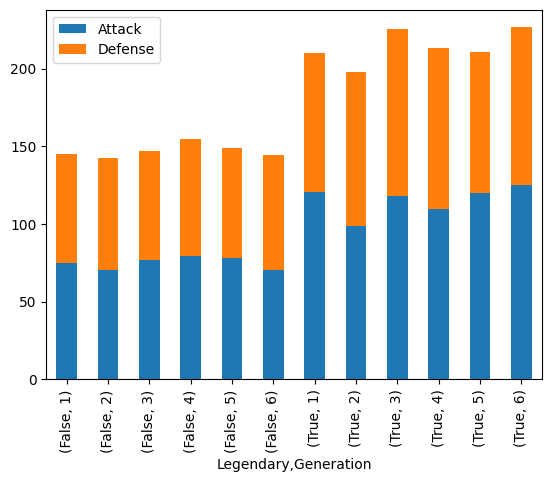

In [18]:
pokemon_stats_legendary.plot.bar(stacked=True)
plt.show()

### Q4. line stacked plot



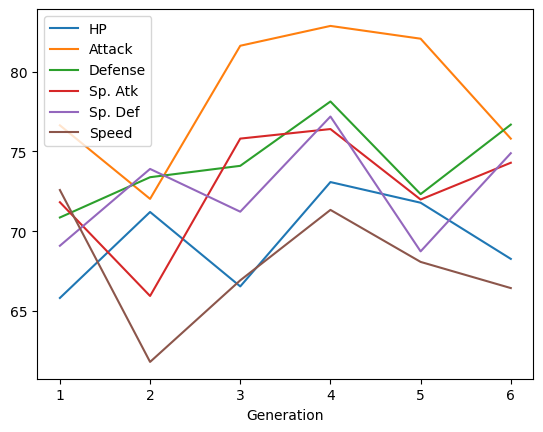

In [19]:
pokemon_stats_by_generation = pokemon.groupby('Generation').mean()[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

pokemon_stats_by_generation.plot.line()

plt.show()